In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_excel(r"C:\Users\Dell\Desktop\End To End\Recession Prediction\dataset\allmonth.xls")

In [3]:
df.head()

,Date,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec
0,1959-01-31,4.02,2.82,2.879694,1.140306,0.104719,0
1,1959-02-28,3.96,2.70,2.756312,1.203688,0.097620,0
2,1959-03-31,3.99,2.80,2.859125,1.130875,0.105806,0
3,1959-04-30,4.12,2.95,3.013443,1.106557,0.108648,0
4,1959-05-31,4.31,2.84,2.900265,1.409735,0.076983,0


In [4]:
df.shape

(777, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Date                                            777 non-null    datetime64[ns]
 1   10 Year Treasury Yield                          777 non-null    float64       
 2   3 Month Treasury Yield                          777 non-null    float64       
 3   3 Month Treasury Yield (Bond Equivalent Basis)  777 non-null    float64       
 4   Spread                                          777 non-null    float64       
 5   Rec_prob                                        777 non-null    float64       
 6   NBER_Rec                                        777 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 42.6 KB


In [6]:
df.describe()

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,5.797954,4.350129,4.486045,1.311909,0.143842,0.122265
std,2.933061,3.152233,3.288649,1.272944,0.165709,0.327803
min,0.620000,0.010000,0.010139,-3.505137,0.000795,0.000000
25%,3.860000,1.950000,1.986877,0.420914,0.022335,0.000000
50%,5.360000,4.440000,4.552764,1.361503,0.081488,0.000000
75%,7.520000,5.960000,6.135208,2.329290,0.211931,0.000000
max,15.320000,16.300000,17.236584,4.145955,0.954049,1.000000


In [7]:
df.isnull().sum()

Date                                              0
10 Year Treasury Yield                            0
3 Month Treasury Yield                            0
3 Month Treasury Yield (Bond Equivalent Basis)    0
Spread                                            0
Rec_prob                                          0
NBER_Rec                                          0
dtype: int64

In [8]:
df.columns

Index(['Date', '10 Year Treasury Yield', '3 Month Treasury Yield',
       '3 Month Treasury Yield (Bond Equivalent Basis)', 'Spread', 'Rec_prob',
       'NBER_Rec'],
      dtype='object')

In [9]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [10]:
df = df.drop(columns='Date', axis=1)

In [11]:
df.head()

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec,year,month,day
0,4.02,2.82,2.879694,1.140306,0.104719,0,1959,1,31
1,3.96,2.70,2.756312,1.203688,0.097620,0,1959,2,28
2,3.99,2.80,2.859125,1.130875,0.105806,0,1959,3,31
3,4.12,2.95,3.013443,1.106557,0.108648,0,1959,4,30
4,4.31,2.84,2.900265,1.409735,0.076983,0,1959,5,31


In [12]:
# Recession Wise

df.head()

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,NBER_Rec,year,month,day
0,4.02,2.82,2.879694,1.140306,0.104719,0,1959,1,31
1,3.96,2.70,2.756312,1.203688,0.097620,0,1959,2,28
2,3.99,2.80,2.859125,1.130875,0.105806,0,1959,3,31
3,4.12,2.95,3.013443,1.106557,0.108648,0,1959,4,30
4,4.31,2.84,2.900265,1.409735,0.076983,0,1959,5,31


c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

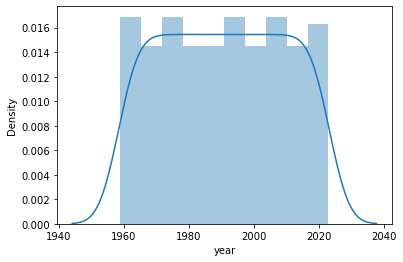

In [13]:
sns.distplot(df['year'])

In [14]:
X = df.drop('NBER_Rec', axis=1)
y=df['NBER_Rec']

In [15]:
X

,10 Year Treasury Yield,3 Month Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread,Rec_prob,year,month,day
0,4.02,2.82,2.879694,1.140306,0.104719,1959,1,31
1,3.96,2.70,2.756312,1.203688,0.097620,1959,2,28
2,3.99,2.80,2.859125,1.130875,0.105806,1959,3,31
3,4.12,2.95,3.013443,1.106557,0.108648,1959,4,30
4,4.31,2.84,2.900265,1.409735,0.076983,1959,5,31
...,...,...,...,...,...,...,...,...
772,3.57,5.14,5.279991,-1.709991,0.708540,2023,5,31
773,3.75,5.16,5.300807,-1.550807,0.673054,2023,6,30
774,3.90,5.25,5.394506,-1.494506,0.660095,2023,7,31
775,4.17,5.30,5.446580,-1.276580,0.608256,2023,8,31


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
772    0
773    0
774    0
775    0
776    0
Name: NBER_Rec, Length: 777, dtype: int64

In [17]:
# seprate datast form train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((582, 8), (195, 8))

In [22]:
import pickle
##standard Scaling- Standardization
from sklearn.preprocessing import StandardScaler

def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open(r'C:\Users\Dell\Desktop\End To End\Recession Prediction\models\standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [23]:
X_train_scaled, X_test_scaled = scaler_standard(X_train,X_test)

In [24]:
X_train_scaled

array([[ 0.57186335,  0.60708005,  0.59906212, ..., -1.11786732,
         0.72508766, -0.50801864],
       [ 1.98051134,  1.20760264,  1.20505436, ..., -0.30967008,
        -0.71322529, -0.50801864],
       [-1.16802613, -0.63006213, -0.63157058, ...,  1.52224367,
        -0.4255627 ,  0.68901313],
       ...,
       [-0.95882098, -1.38809885, -1.37402868, ...,  1.09120514,
        -0.13790011, -0.50801864],
       [-0.51949017, -0.27237381, -0.27819584, ...,  0.76792625,
         0.43742507,  0.68901313],
       [-1.27611545, -1.31590488, -1.3036922 , ...,  1.36060422,
        -1.57621305,  0.68901313]])

In [25]:
X_test_scaled

array([[ 0.34173769,  0.37080886,  0.36219705, ..., -1.0639875 ,
         0.14976248,  0.68901313],
       [ 0.19180733,  0.5742646 ,  0.56611184, ..., -1.17174714,
        -1.00088788,  0.68901313],
       [-0.43580811, -0.96477964, -0.96048186, ...,  0.71404643,
         0.14976248,  0.68901313],
       ...,
       [-0.42883461, -0.12470432, -0.13173364, ...,  0.87568588,
         0.72508766, -0.50801864],
       [ 0.66251891,  0.31174106,  0.3031173 , ...,  0.01360882,
         0.72508766, -0.50801864],
       [ 0.46726077, -0.06563652, -0.07305449, ...,  0.01360882,
         1.58807543,  0.68901313]])

In [26]:
## Decision Tree Model Training with HyperParameter Tuning
import warnings
warnings.filterwarnings('ignore')

In [27]:
parameter={
  'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
}

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

In [30]:
clf=GridSearchCV(classifier, param_grid=parameter, cv=3, scoring='accuracy',verbose=3)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] criterion=gini, max_depth=1, max_features=auto, splitter=best ...
[CV]  criterion=gini, max_depth=1, max_features=auto, splitter=best, score=0.871, total=   0.1s
[CV] criterion=gini, max_depth=1, max_features=auto, splitter=best ...
[CV]  criterion=gini, max_depth=1, max_features=auto, splitter=best, score=0.876, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=auto, splitter=best ...
[CV]  criterion=gini, max_depth=1, max_features=auto, splitter=best, score=0.876, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=auto, splitter=random .
[CV]  criterion=gini, max_depth=1, max_features=auto, splitter=random, score=0.876, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=auto, splitter=random .
[CV]  criterion=gini, max_depth=1, max_features=auto, splitter=random, score=0.876, total=   0.0s
[CV] criterion=gini, max_depth=1, max_features=auto, splitter=random .
[CV]  criterion=gini, max_de

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=sqrt, splitter=random, score=0.876, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, splitter=best ...
[CV]  criterion=gini, max_depth=2, max_features=log2, splitter=best, score=0.876, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, splitter=best ...
[CV]  criterion=gini, max_depth=2, max_features=log2, splitter=best, score=0.881, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, splitter=best ...
[CV]  criterion=gini, max_depth=2, max_features=log2, splitter=best, score=0.876, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, splitter=random .
[CV]  criterion=gini, max_depth=2, max_features=log2, splitter=random, score=0.876, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, splitter=random .
[CV]  criterion=gini, max_depth=2, max_features=log2, splitter=random, score=0.881, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=log2, splitter=r

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    0.8s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [31]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [34]:
classifier=DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='log2',splitter='best')

In [35]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [38]:
## Support Vector Classifier With HyperParameter Tuning

from sklearn.svm import SVC

SVC_parameters = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear','rbf','polynomial']
}

In [39]:
grid = GridSearchCV(SVC(),param_grid=SVC_parameters, cv=3,verbose=3,scoring='accuracy')

In [40]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.871, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.876, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.876, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.871, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.876, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.876, total=   0.0s
[CV] C=0.1, gamma=1, kernel=polynomial ...............................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.876, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.871, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.876, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.876, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=polynomial .............................
[CV] ... C=0.1, gamma=0.1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=polynomial .............................
[CV] ... C=0.1, gamma=0.1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=polynomial .............................
[CV] ... C=0.1, gamma=0.1, kernel=polynomial, score=nan, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.1s finished


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [41]:
grid.best_params_


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [42]:
svc_clf=SVC(C= 10, gamma= 0.1, kernel= 'rbf')
svc_clf.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1)

In [43]:
# Naive Baye's Imlementation

from sklearn.naive_bayes import BernoulliNB
gnb=BernoulliNB()

In [44]:
gnb.fit(X_train_scaled, y_train)

BernoulliNB()

In [45]:
## Lets check how well our model performs

In [51]:
## Decision Tree Prediction

y_pred_DT = classifier.predict(X_test)



In [52]:
## SVC prediction

y_pred_SVC = svc_clf.predict(X_test_scaled)

In [59]:
## Naive Baye's prediction

y_pred_NB = gnb.predict(X_test_scaled)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [61]:
## Accuracy for Decision Tree

accuracy_DT = accuracy_score(y_test,y_pred_DT)
accuracy_DT

0.8871794871794871

In [62]:
## Accuracy for SVC

accuracy_SVC = accuracy_score(y_test,y_pred_SVC)
accuracy_SVC

0.8666666666666667

In [63]:
## Accuracy for Naive Baye's

accuracy_NB = accuracy_score(y_test, y_pred_NB)
accuracy_NB

0.8871794871794871

In [66]:
## Confusion Matrics

## Confusion Matrics of DT

conf_mat_DT = confusion_matrix(y_test,y_pred_DT )
conf_mat_DT

array([[167,   6],
       [ 16,   6]], dtype=int64)

In [67]:
## Confusion Matrics of SVC

conf_mat_SVC = confusion_matrix(y_test, y_pred_SVC)

conf_mat_SVC

array([[167,   6],
       [ 20,   2]], dtype=int64)

In [68]:
## Confusion Matrics of SVC
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)
conf_mat_NB

array([[173,   0],
       [ 22,   0]], dtype=int64)

In [69]:
import pickle
file = open(r'C:\Users\Dell\Desktop\End To End\Recession Prediction\models\modelForPrediction.pkl','wb')
pickle.dump(gnb,file)
file.close()